<div class="alert alert-block alert-success">
<h1>Alexa Amazon Reviews - Sentiment Analysis</h1> 
    
- **Problem to solve:** discover insights into consumer reviews and assist with machine learning models.You can also train your machine models for sentiment analysis and analyze customer reviews how many positive reviews ? and how many negative reviews ?
    
**Data Information:** 
   - The dataset consists of 3000 Amazon customer reviews 
   - Rating
   - Date
   - Variation     
   - Verified Reviews
   - Feedback 

In [142]:
# Import the requierd libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the data using read_csv

alexa_df = pd.read_csv('amazon_reviews.csv')

In [6]:
# Show the first 5 rows

alexa_df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
# Show the last 5 rows

alexa_df.tail(5)

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [17]:
# What is the average rating?

alexa_df['rating'].mean()

4.463174603174603

In [16]:
# How many unique classes do we have in the variation column?

alexa_df['variation'].nunique()

16

In [13]:
# What is memory usage of this dataframe in memory?

alexa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [143]:
# Check out the verified_reviews column (Text data)

alexa_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [144]:
# Convert all words in a given column into upper case by applying str.upper()

alexa_df['verified_reviews'].str.upper()

0                                           LOVE MY ECHO!
1                                               LOVED IT!
2       SOMETIMES WHILE PLAYING A GAME, YOU CAN ANSWER...
3       I HAVE HAD A LOT OF FUN WITH THIS THING. MY 4 ...
4                                                   MUSIC
                              ...                        
3145    PERFECT FOR KIDS, ADULTS AND EVERYONE IN BETWE...
3146    LISTENING TO MUSIC, SEARCHING LOCATIONS, CHECK...
3147    I DO LOVE THESE THINGS, I HAVE THEM RUNNING MY...
3148    ONLY COMPLAINT I HAVE IS THAT THE SOUND QUALIT...
3149                                                 GOOD
Name: verified_reviews, Length: 3150, dtype: object

In [20]:
# Convert all words in a given column into lower case by applying str.upper()

alexa_df['verified_reviews'].str.lower()

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
3145    perfect for kids, adults and everyone in betwe...
3146    listening to music, searching locations, check...
3147    i do love these things, i have them running my...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [23]:
# I could also convert the headernames into upper case if need it.

alexa_df.columns.str.upper()

Index(['RATING', 'DATE', 'VARIATION', 'VERIFIED_REVIEWS', 'FEEDBACK'], dtype='object')

In [145]:
# Apply a method to return strings where the first character in every word is upper case

alexa_df['verified_reviews'].str.title()

0                                           Love My Echo!
1                                               Loved It!
2       Sometimes While Playing A Game, You Can Answer...
3       I Have Had A Lot Of Fun With This Thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect For Kids, Adults And Everyone In Betwe...
3146    Listening To Music, Searching Locations, Check...
3147    I Do Love These Things, I Have Them Running My...
3148    Only Complaint I Have Is That The Sound Qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# 3. PANDAS OPERATIONS PART #1

In [147]:
# Obtain the length of a given string (how many characters per string) and add it to a new column

alexa_df['reviews_lenght'] = alexa_df['verified_reviews'].str.len()
alexa_df

,rating,date,variation,verified_reviews,feedback,reviews_lenght,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_join,lenght
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love],love,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved],loved,1
2,4,31-Jul-18,Walnut Finish (Best Seller) (Best Seller),"Sometimes while playing a game, you can answer...",1,195,Sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c...",sometimes playing game answer question correct...,16
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, yr, old, learns, dinosaurs, ...",lot fun thing yr old learns dinosaurs control ...,18
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music,[music],music,1
...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]",perfect kids adults everyone,4
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...,"[listening, music, searching, locations, check...",listening music searching locations checking t...,13
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh...",love things running entire home tv lights ther...,42
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,Only complaint I have is that the sound qualit...,"[complaint, sound, quality, isnt, great, mostl...",complaint sound quality isnt great mostly use ...,34


In [148]:
# Let's obtain the shortest review

alexa_df['reviews_lenght'].min()

1

In [38]:
# Let's obtain the longest review

alexa_df['reviews_lenght'].max()

2851

In [44]:
# Let's filter out the shortest reviews

alexa_df[alexa_df['reviews_lenght'] == alexa_df['reviews_lenght'].min()]


,rating,date,variation,verified_reviews,feedback,reviews_lenght
60,5,30-Jul-18,Heather Gray Fabric,😍,1,1
85,5,30-Jul-18,Heather Gray Fabric,,1,1
183,3,29-Jul-18,Heather Gray Fabric,,1,1
219,5,29-Jul-18,Sandstone Fabric,,1,1
374,1,26-Jul-18,Black,,0,1
...,...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1,1
3120,5,30-Jul-18,Black Dot,,1,1
3123,4,30-Jul-18,Black Dot,,1,1
3126,5,30-Jul-18,Black Dot,,1,1


**MINI CHALLENGE #3:**


In [45]:
# Let's locate the verified review that has the maximum number of characters

alexa_df[alexa_df['reviews_lenght'] == alexa_df['reviews_lenght'].max()]

,rating,date,variation,verified_reviews,feedback,reviews_lenght
2016,5,20-Jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [48]:
# Check the entire review

alexa_df[alexa_df['reviews_lenght'] == alexa_df['reviews_lenght'].max()]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

## Text Operations

In [52]:
# Filter the DataFrame by selecting rows that only ends with the word "love"
# Note that I had to convert all words into lower case first 

mask = alexa_df['verified_reviews'].str.lower().str.endswith('love')
alexa_df[mask]

,rating,date,variation,verified_reviews,feedback,reviews_lenght
438,5,7-Jul-18,Black,Love,1,4
2018,5,19-Jul-18,Black Plus,"Love, Love, Love",1,16


In [54]:
# Alternate way to do the same thing

alexa_df[alexa_df['verified_reviews'].str.lower().str.endswith('love')]

,rating,date,variation,verified_reviews,feedback,reviews_lenght
438,5,7-Jul-18,Black,Love,1,4
2018,5,19-Jul-18,Black Plus,"Love, Love, Love",1,16


In [55]:
# Filter the DataFrame by selecting rows that only starts with the word "love"
# Note that I had to convert all words into lower case first 

alexa_df[alexa_df['verified_reviews'].str.lower().str.startswith('love')]

,rating,date,variation,verified_reviews,feedback,reviews_lenght
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,114
13,5,30-Jul-18,Charcoal Fabric,"Love, Love, Love!!",1,18
20,5,30-Jul-18,Charcoal Fabric,Love the Echo and how good the music sounds pl...,1,246
...,...,...,...,...,...,...
3089,5,30-Jul-18,Black Dot,Love Alexa!! I own 2 and gave one for a gift ...,1,67
3110,5,30-Jul-18,White Dot,"Love it! I personally prefer Spotify music, so...",1,401
3111,5,30-Jul-18,Black Dot,Love it. It works great. Alexa still has som...,1,174
3124,5,30-Jul-18,Black Dot,Love my Alexa! Actually have 3 throughout the ...,1,128


In [149]:
# Filter the DataFrame by selecting rows that contains the word "love" in any location

mask = alexa_df['verified_reviews'].str.lower().str.contains('love')
alexa_df[mask]

,rating,date,variation,verified_reviews,feedback,reviews_lenght,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_join,lenght
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love],love,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved],loved,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,114,Love it I’ve listened to songs I haven’t heard...,"[love, listened, songs, heard, since, childhoo...",love listened songs heard since childhood get ...,11
11,5,30-Jul-18,Charcoal Fabric,I love it! Learning knew things with it eveyda...,1,169,I love it Learning knew things with it eveyday...,"[love, learning, knew, things, eveyday, still,...",love learning knew things eveyday still figuri...,16
13,5,30-Jul-18,Charcoal Fabric,"Love, Love, Love!!",1,18,Love Love Love,"[love, love, love]",love love love,3
...,...,...,...,...,...,...,...,...,...,...
3124,5,30-Jul-18,Black Dot,Love my Alexa! Actually have 3 throughout the ...,1,128,Love my Alexa Actually have 3 throughout the h...,"[love, actually, throughout, house, favorite, ...",love actually throughout house favorite functi...,12
3135,5,30-Jul-18,White Dot,I loved it does exactly what it says,1,36,I loved it does exactly what it says,"[loved, exactly, says]",loved exactly says,3
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1,117,My three year old loves it Good for doing bas...,"[three, year, old, loves, good, basic, househo...",three year old loves good basic household task...,13
3144,5,30-Jul-18,Black Dot,love it,1,7,love it,[love],love,1


In [56]:
# Spliting the string into a list 

alexa_df['verified_reviews'].str.split()

0                                       [Love, my, Echo!]
1                                            [Loved, it!]
2       [Sometimes, while, playing, a, game,, you, can...
3       [I, have, had, a, lot, of, fun, with, this, th...
4                                                 [Music]
                              ...                        
3145    [Perfect, for, kids,, adults, and, everyone, i...
3146    [Listening, to, music,, searching, locations,,...
3147    [I, do, love, these, things,, i, have, them, r...
3148    [Only, complaint, I, have, is, that, the, soun...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

## Perform text data cleaning by remove punctuations

In [150]:
# String contains constants and classes for working with text

import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
# Let's define a function to remove punctuations

def remove_punc(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    return test_punc_removed_join

In [65]:
# Let's remove punctuations from our dataset 

alexa_df['verified_reviews_nopunc'] = alexa_df['verified_reviews'].apply(remove_punc)
alexa_df

,rating,date,variation,verified_reviews,feedback,reviews_lenght,verified_reviews_nopunc
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it
2,4,31-Jul-18,Walnut Finish (Best Seller) (Best Seller),"Sometimes while playing a game, you can answer...",1,195,Sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,Only complaint I have is that the sound qualit...


In [67]:
# Explore 1 row from the DataFrame and check if the function worked as expected

alexa_df[alexa_df['reviews_lenght'] == alexa_df['reviews_lenght'].max()]['verified_reviews_nopunc'].iloc[0]

'Incredible piece of technologyI have this right center of my living room on an island kitchen counter The mic and speaker goes in every direction and the quality of the sound is quite good I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing Its no audiophile equipment but there is good range and decent bass The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building The knob on the top works great for adjusting volume This is my first Echo device and I would imagine having to press volume buttons on the Echo 2 a large inconvenience and not as precise For that alone I would recommend this over the regular Echo 2nd generationThe piece looks quality and is quite sturdy with some weight on it The rubber material on the bottom has a good grip on the granite counter my cat can even rub her scent on it without tipping it overThis order came with a free Philips Hue Bulb whic

## Perform text data cleaning by removing stopwords

In [73]:
# Import the requierd text manipulation libraries

import nltk
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess

In [ ]:
# download stopwords

nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [79]:
# Add more stopwords by using extend

stop_words = stopwords.words('english')
stop_words.extend(['amazon', 'Amazon', 'Alexa', 'alexa', 'device', 'dot', 'echo', 'Echo', 'really'])

In [80]:
# Simple_preprocess converts a string into a series of lowered case tokens
# Let's try it on a sample dataset 

gensim.utils.simple_preprocess(alexa_df['verified_reviews'][0])

['love', 'my', 'echo']

In [81]:
# Remove stopwords and remove short words (less than 2 characters)

def preprocess (text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) >=3:
            result.append(token)
            
    return result

In [82]:
# Apply pre-processing to the text column

alexa_df['verified_reviews_nopunc_nostopwords'] = alexa_df['verified_reviews_nopunc'].apply(preprocess)

In [83]:
alexa_df['verified_reviews'][38]

'This thing is way cool!  You should get one.  If you want to be cool, that is.'

In [84]:
alexa_df['verified_reviews_nopunc_nostopwords'][38]

['thing', 'way', 'cool', 'get', 'one', 'want', 'cool']

In [85]:
alexa_df

,rating,date,variation,verified_reviews,feedback,reviews_lenght,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love]
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved]
2,4,31-Jul-18,Walnut Finish (Best Seller) (Best Seller),"Sometimes while playing a game, you can answer...",1,195,Sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, yr, old, learns, dinosaurs, ..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music,[music]
...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]"
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...,"[listening, music, searching, locations, check..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,Only complaint I have is that the sound qualit...,"[complaint, sound, quality, isnt, great, mostl..."


In [86]:
# Join the words into a string

alexa_df['verified_reviews_nopunc_nostopwords_join'] = alexa_df['verified_reviews_nopunc_nostopwords'].apply(lambda x: " ".join(x))

In [87]:
alexa_df

,rating,date,variation,verified_reviews,feedback,reviews_lenght,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_join
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love],love
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved],loved
2,4,31-Jul-18,Walnut Finish (Best Seller) (Best Seller),"Sometimes while playing a game, you can answer...",1,195,Sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c...",sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, yr, old, learns, dinosaurs, ...",lot fun thing yr old learns dinosaurs control ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music,[music],music
...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]",perfect kids adults everyone
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...,"[listening, music, searching, locations, check...",listening music searching locations checking t...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh...",love things running entire home tv lights ther...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,Only complaint I have is that the sound qualit...,"[complaint, sound, quality, isnt, great, mostl...",complaint sound quality isnt great mostly use ...


## Tokenization and padding

![alt text](https://drive.google.com/uc?id=1w7r6pUAm1WkFRWAzp0tdcsVfDwzR9dWw)


In [90]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(alexa_df['verified_reviews_nopunc_nostopwords_join'])

In [91]:
alexa_countvectorizer.shape

(3150, 4162)

In [92]:
print(vectorizer.get_feature_names())

['abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'absolutely', 'absolutly', 'ac', 'accent', 'accentthe', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessneeds', 'accessories', 'accesss', 'accessto', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activate', 'activated', 'activates', 'activating', 'activation', 'actively', 'activities', 'acts', 'actually', 'ad', 'adapted', 'adapter', 'adapting', 'add', 'added', 'addict', 'addicted', 'addicts', 'adding', 'addition', 'additional', 'additionally', 'addons', 'addressed', 'addresses', 'adds', 'adept', 'adequate', 'adjacent', 'adjust', 'adjusting', 'adjustment', 'adjusts', 'admit', 'adopters', 'adorable', 'ads', 'adults', 'advance', 'advanced', 'advantage', 'advantages', 'advertise', 'adver

C:\Users\Elite-90\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Text data visualization

In [95]:
# Let's get the number of words in every row in the DataFrame

alexa_df['lenght'] = alexa_df['verified_reviews_nopunc_nostopwords'].apply(len)
alexa_df

,rating,date,variation,verified_reviews,feedback,reviews_lenght,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_join,lenght
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love],love,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved],loved,1
2,4,31-Jul-18,Walnut Finish (Best Seller) (Best Seller),"Sometimes while playing a game, you can answer...",1,195,Sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c...",sometimes playing game answer question correct...,16
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, yr, old, learns, dinosaurs, ...",lot fun thing yr old learns dinosaurs control ...,18
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music,[music],music,1
...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]",perfect kids adults everyone,4
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...,"[listening, music, searching, locations, check...",listening music searching locations checking t...,13
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh...",love things running entire home tv lights ther...,42
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,Only complaint I have is that the sound qualit...,"[complaint, sound, quality, isnt, great, mostl...",complaint sound quality isnt great mostly use ...,34


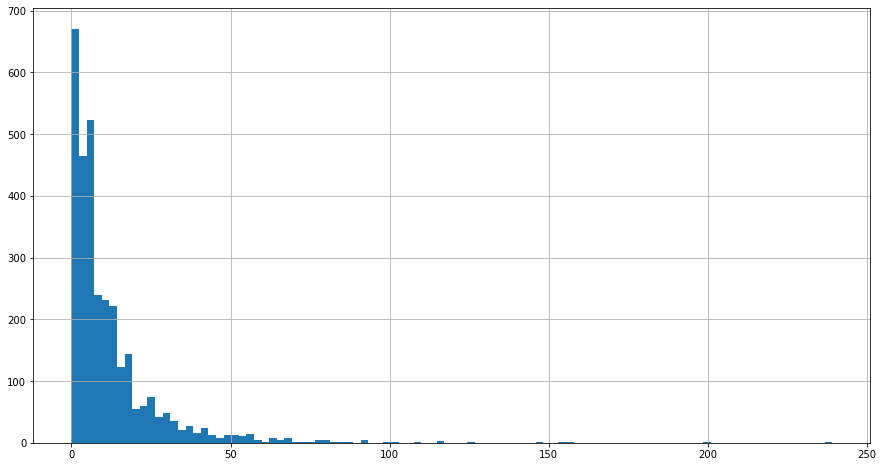

In [105]:
# Let's plot the histogram of the length column

alexa_df['lenght'].hist(bins = 100, figsize = (15,8));


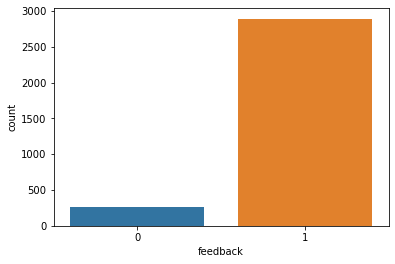

In [104]:
# Use count plot to show how many samples have positive/negative feedback

sns.countplot(x = 'feedback', data = alexa_df);

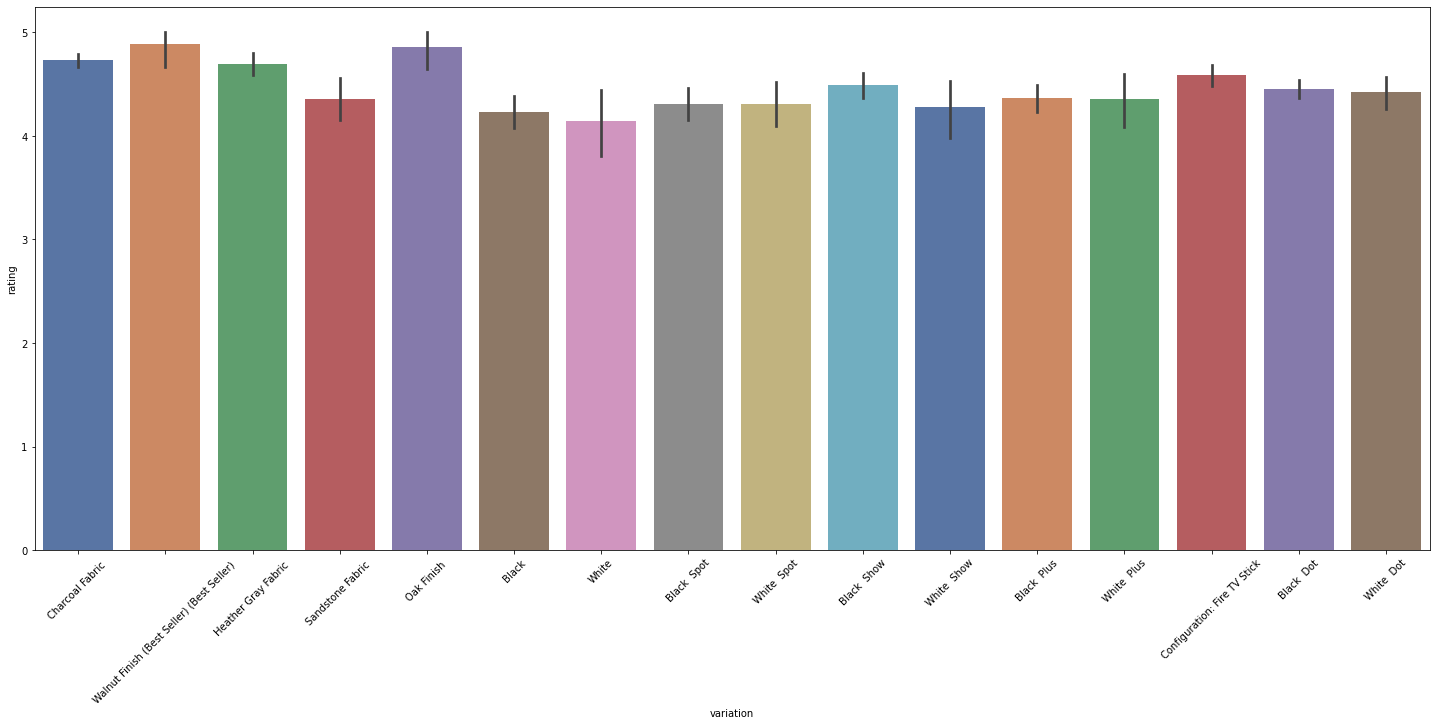

In [111]:
# Use Seaborn barplot to show variations/ratings

plt.figure(figsize = (25,10))
sns.barplot(x = 'variation', y = 'rating', data = alexa_df, palette = 'deep')
plt.xticks(rotation = 45);

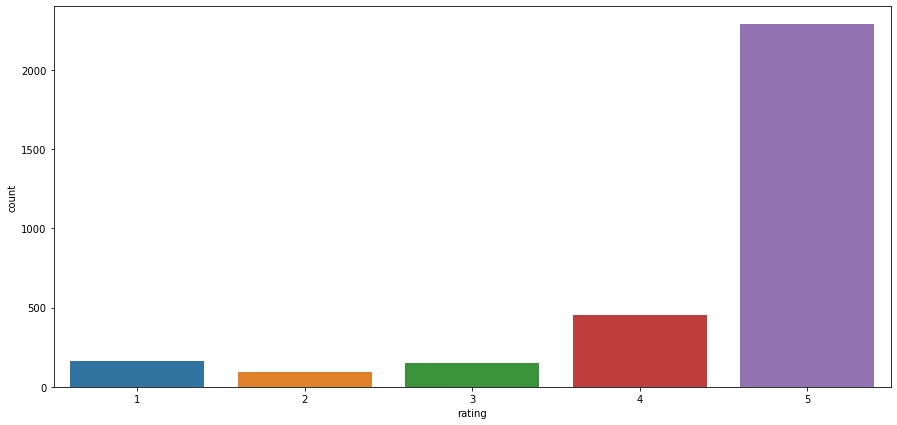

In [115]:
# Plot the count plot for the ratings column

plt.figure(figsize = (15,7))
sns.countplot(x = 'rating', data = alexa_df);

## Word Cloud

In [119]:
# Take a dataframe column and convert it into a list

sentences = alexa_df['verified_reviews_nopunc_nostopwords_join'].tolist()
sentences

['love',
 'loved',
 'sometimes playing game answer question correctly says got wrong answers like able turn lights away home',
 'lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well',
 'music',
 'received gift needed another bluetooth something play music easily accessible found smart speaker wait see else',
 'without cellphone cannot use many features ipad see use great alarm almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet',
 'think th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house',
 'looks great',
 'love listened songs heard since childhood get news weather information great',
 'sent year old dad talks constantly',
 'love learning knew things eveyday still figuring everything works far easy use understand make laugh times',
 'purchased moth

In [120]:
len(sentences)

3150

In [121]:
print(sentences)

['love', 'loved', 'sometimes playing game answer question correctly says got wrong answers like able turn lights away home', 'lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well', 'music', 'received gift needed another bluetooth something play music easily accessible found smart speaker wait see else', 'without cellphone cannot use many features ipad see use great alarm almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet', 'think th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house', 'looks great', 'love listened songs heard since childhood get news weather information great', 'sent year old dad talks constantly', 'love learning knew things eveyday still figuring everything works far easy use understand make laugh times', 'purchased mother knee prob

In [122]:
# Join all elements in the list into one massive string!

words_as_one_string = " ".join(sentences)

In [123]:
words_as_one_string

'love loved sometimes playing game answer question correctly says got wrong answers like able turn lights away home lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well music received gift needed another bluetooth something play music easily accessible found smart speaker wait see else without cellphone cannot use many features ipad see use great alarm almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet think th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house looks great love listened songs heard since childhood get news weather information great sent year old dad talks constantly love learning knew things eveyday still figuring everything works far easy use understand make laugh times purchased mother knee problems give something trying come getti

In [126]:
#Import the WordCloud library

from wordcloud import WordCloud

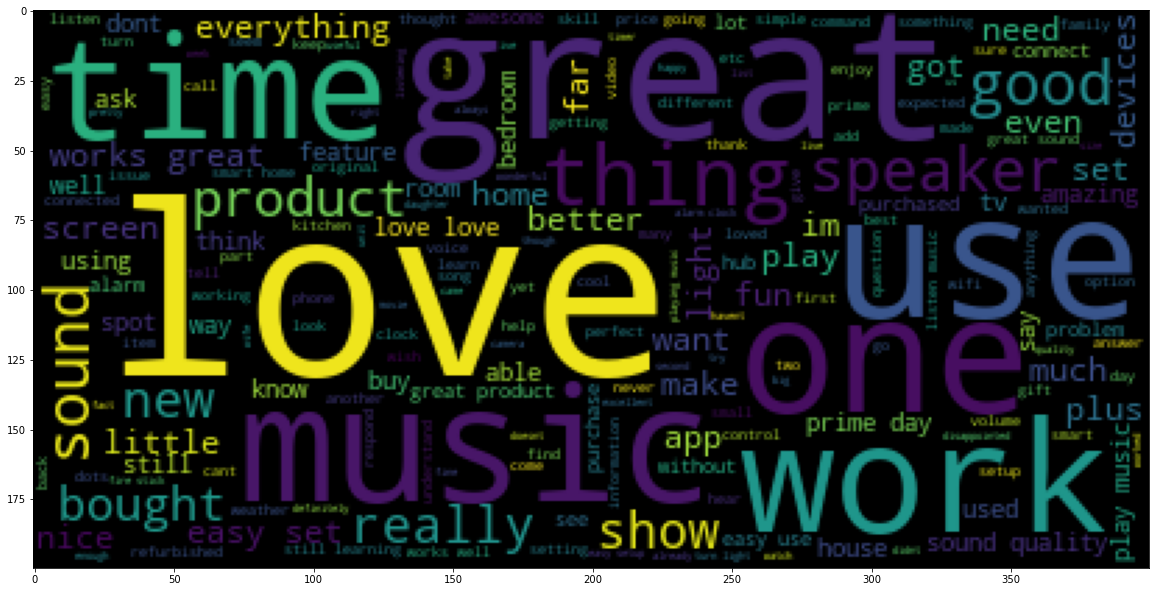

In [129]:
# Display the most common words

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(words_as_one_string));

In [131]:
positive_df = alexa_df[alexa_df['rating']==5]
positive_df

,rating,date,variation,verified_reviews,feedback,reviews_lenght,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_join,lenght
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Love my Echo,[love],love,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Loved it,[loved],loved,1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, yr, old, learns, dinosaurs, ...",lot fun thing yr old learns dinosaurs control ...,18
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Music,[music],music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,172,I received the echo as a gift I needed another...,"[received, gift, needed, another, bluetooth, s...",received gift needed another bluetooth somethi...,16
...,...,...,...,...,...,...,...,...,...,...
3144,5,30-Jul-18,Black Dot,love it,1,7,love it,[love],love,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]",perfect kids adults everyone,4
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Listening to music searching locations checkin...,"[listening, music, searching, locations, check...",listening music searching locations checking t...,13
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,I do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh...",love things running entire home tv lights ther...,42


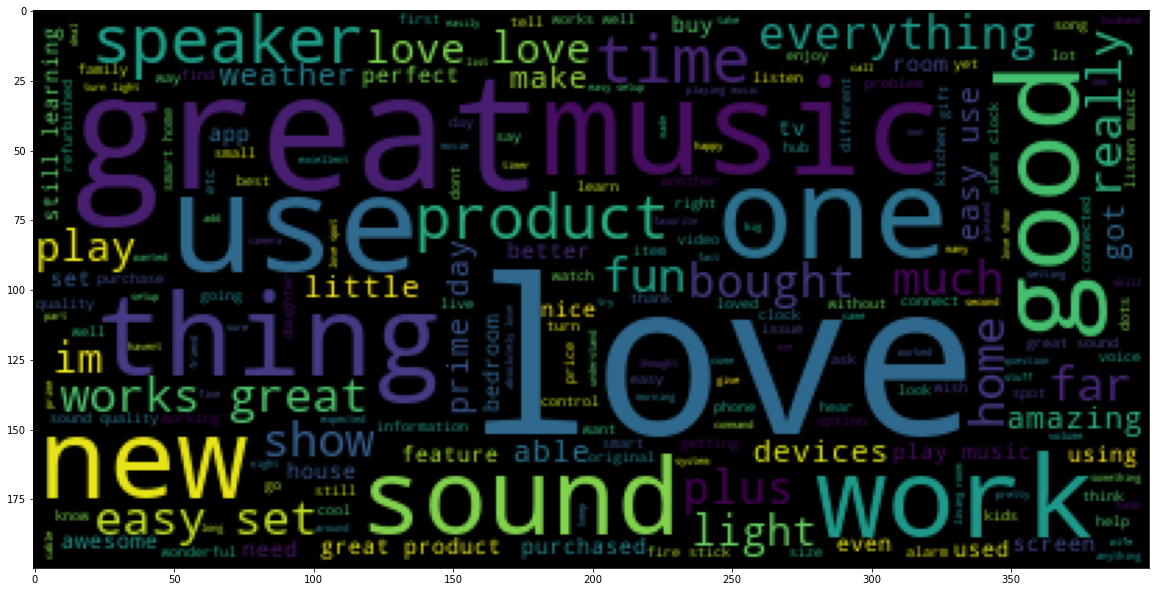

In [138]:
# Display the positive rating words

sentences = positive_df['verified_reviews_nopunc_nostopwords_join'].tolist() 
words_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(words_as_one_string));

In [140]:
nagative_df

,rating,date,variation,verified_reviews,feedback,reviews_lenght,verified_reviews_nopunc,verified_reviews_nopunc_nostopwords,verified_reviews_nopunc_nostopwords_join,lenght
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18,Not much features,"[much, features]",much features,2
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87,Stopped working after 2 weeks didnt follow com...,"[stopped, working, weeks, didnt, follow, comma...",stopped working weeks didnt follow commands re...,9
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0,22,Alexa hardly came on,"[hardly, came]",hardly came,2
350,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0,109,Item no longer works after just 5 months of us...,"[item, longer, works, months, use, connect, wi...",item longer works months use connect wifi unre...,10
361,1,29-Jul-18,Black,This thing barely works. You have to select 3r...,0,154,This thing barely works You have to select 3rd...,"[thing, barely, works, select, rd, party, apps...",thing barely works select rd party apps stuff ...,19
...,...,...,...,...,...,...,...,...,...,...
3024,1,30-Jul-18,Black Dot,I was really happy with my original echo so i ...,0,673,I was really happy with my original echo so i ...,"[really, happy, original, thought, id, get, us...",really happy original thought id get use bedro...,57
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120,Echo Dot responds to us when we arent even tal...,"[responds, us, arent, even, talking, ive, unpl...",responds us arent even talking ive unplugged f...,11
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37,NOT CONNECTED TO MY PHONE PLAYLIST,"[connected, phone, playlist]",connected phone playlist,3
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17,I didn’t order it,[order],order,1


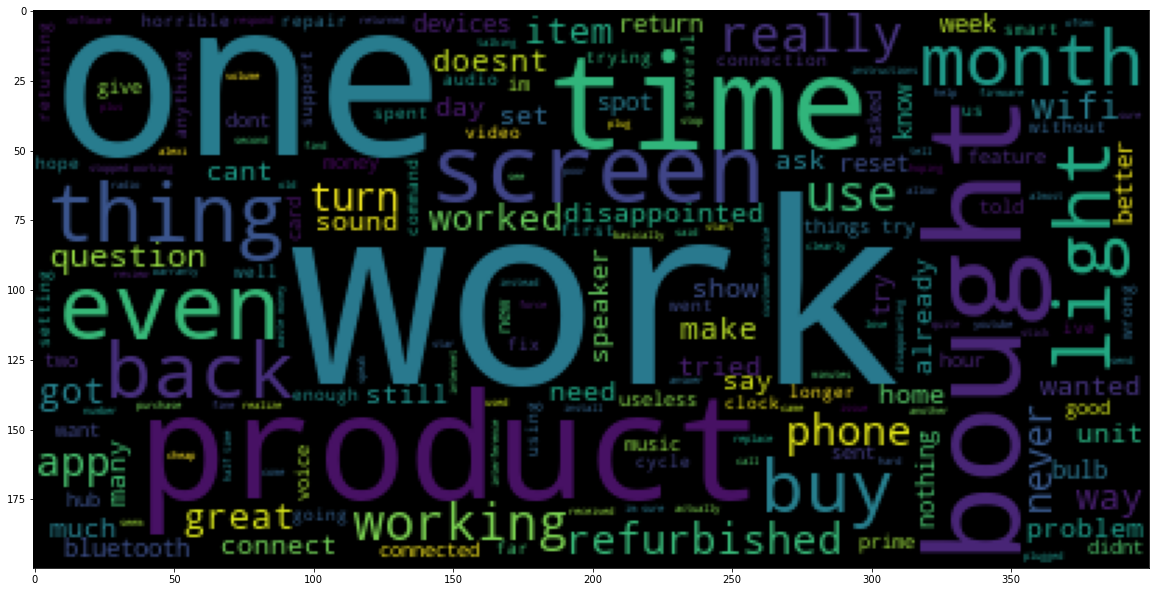

In [141]:
# Display the negative rating words

nagative_df = alexa_df[alexa_df['rating']==1]

sentences = nagative_df['verified_reviews_nopunc_nostopwords_join'].tolist() 
words_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(words_as_one_string));